In [1]:
import sys
sys.path.insert(0, 'C:/Users/ander/Repositorios/val-metodos-analiticos/funcs')
import functions

import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import pandas as pd
import seaborn as sns
plt.rcParams["font.family"] = "Arial"
plt.rcParams["font.size"] = 10

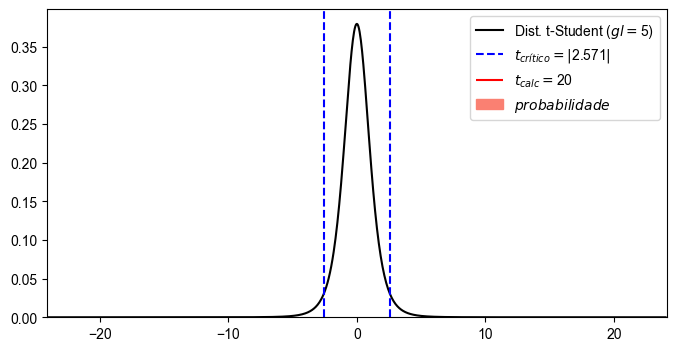

In [4]:
def make_t_distribution_plot(t_calc, gl, alpha=0.05):
    
    t_critico = stats.t.ppf(1-alpha/2, gl)
    
    if np.abs(t_calc) < t_critico:
        x_lim = 5
    else:
        x_lim = np.abs(t_calc)*1.2

    # criando o canvas
    fig, ax1 = plt.subplots(figsize=(8,4))

    # criando valores para a distribuição t de Student com gl
    x = np.linspace(-1*x_lim, x_lim, 1000)
    y = stats.t.pdf(x, gl)
    label = "Dist. t-Student ($gl=$" + str(gl) + ")"
    ax1.plot(x, y, c="k", label=label)

    # adicionando linhas com o valor crítico do teste
    label= '$t_{crítico} = |$' + str(round(t_critico, 3)) + '$|$'
    ax1.axvline(stats.t.ppf(1-alpha/2, gl), 0, 1, label=label, color='blue', ls='--')
    ax1.axvline(stats.t.ppf(alpha/2, gl), 0, 1, color='blue', ls='--')

    # adicionando o valor da estatística do teste
    label = "$t_{calc} = $" + str(round(t_calc, 3))
    ax1.vlines(t_calc, 0, stats.t.pdf(np.abs(t_calc), gl, loc=0, scale=1), label=label, color='red')

    # preenchendo o lado esquero
    x = np.linspace(-1*x_lim, -1*abs(t_calc), 1000)
    ax1.fill_between(x, stats.t.pdf(x, gl), label = '$probabilidade$', color = 'salmon')

    # preenchendo o lado direito
    x = np.linspace(abs(t_calc), x_lim, 1000)
    ax1.fill_between(x,stats.t.pdf(x, gl, loc=0, scale=1), color = 'salmon')

    plt.xlim(-1*x_lim - .1, x_lim + .1)
    plt.ylim(bottom=0.0)
    plt.legend(loc=1)
    plt.show()
    
make_t_distribution_plot(t_calc=20, gl=5, alpha=0.05)    

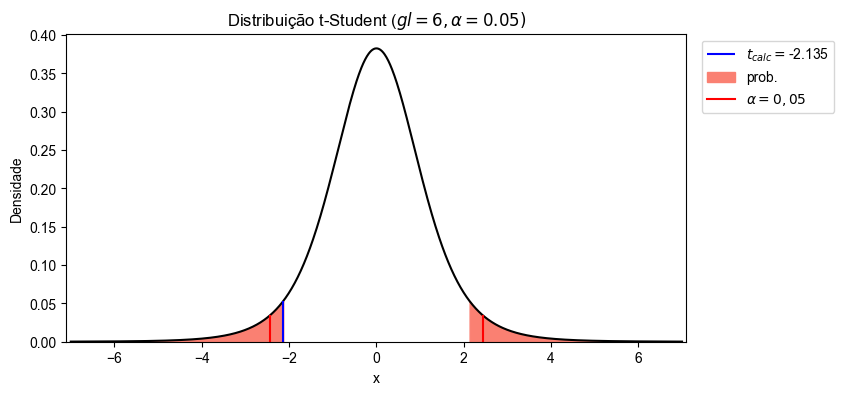

In [95]:
alpha = .05
gl = 6
t_calc = -2.135

t_critico = stats.t.ppf(1-alpha/2, gl)

if np.abs(t_calc) < t_critico:
    x_lim = 5
else:
    x_lim = np.abs(t_calc)*1.2
    
x_lim = 7

# criando o canvas
fig, ax1 = plt.subplots(figsize=(8,4))

# criando valores para a distribuição t de Student com gl
x = np.linspace(-1*x_lim, x_lim, 1000)
y = stats.t.pdf(x, gl)
title = "Distribuição t-Student ($gl=" + str(gl) + ",\\alpha=" + str(alpha) + ")$"
ax1.plot(x, y, c="k",)

# # adicionando linhas com o valor crítico do teste
# label= '$t_{crítico} = $' + str(round(t_critico, 3))
# ax1.axvline(stats.t.ppf(1-alpha/2, gl), 0, 1, label=label, color='blue', ls='--')
# label= '$t_{crítico} = $' + str(round(-1*t_critico, 3)) 
# ax1.axvline(stats.t.ppf(alpha/2, gl), 0, 1, color='red', ls='--', label=label)


# adicionando o valor da estatística do teste
label = "$t_{calc} = $" + str(round(t_calc, 3))
ax1.vlines(t_calc, 0, stats.t.pdf(np.abs(t_calc), gl, loc=0, scale=1), label=label, color='blue')

# # preenchendo o lado esquero
# x = np.linspace(-1*x_lim, -1*abs(t_critico), 1000)
# ax1.fill_between(x, stats.t.pdf(x, gl), color = 'gold', alpha=.5)

# # preenchendo o lado direito
# x = np.linspace(abs(t_critico), x_lim, 1000)
# ax1.fill_between(x,stats.t.pdf(x, gl, loc=0, scale=1), color = 'gold', alpha=.5)



# preenchendo o lado esquero
x = np.linspace(-1*x_lim, -1*abs(t_calc), 1000)
label = '$t_{calc}=' + str(t_calc) + "$"
ax1.fill_between(x, stats.t.pdf(x, gl), label = "prob.", color = 'salmon')

# preenchendo o lado direito
x = np.linspace(abs(t_calc), x_lim, 1000)
ax1.fill_between(x,stats.t.pdf(x, gl, loc=0, scale=1), color = 'salmon')




ax1.plot([t_critico, t_critico], [0, stats.t.pdf(t_critico, gl)], color="red", label="$\\alpha=0,05$")
ax1.plot([-1*t_critico, -1*t_critico], [0, stats.t.pdf(t_critico, gl)], color="red", )

plt.title(title)
plt.xlabel("x")
plt.ylabel("Densidade")
plt.xlim(-1*x_lim - .1, x_lim + .1)
plt.ylim(bottom=0.0)
plt.legend(loc=1, bbox_to_anchor=(1.25,1))
plt.show()